## Who is Johannes Kepler ? What's his 3rd Law?




<img src="jkepler.png" align="left" width=300px />


Johannes Kepler was born into a poor family in the German province of Württemberg and lived much of his
life amid the turmoil of the Thirty Years’ War. He attended university at Tubingen and studied
for a theological career. There, he learned the principles of the Copernican system and became converted to the heliocentric hypothesis. Eventually, Kepler went to Prague to serve as an assistant to Brahe, who set him to work trying to find a satisfactory theory of planetary motion—one that was compatible with the long series of observations made at Hven. Brahe was reluctant to provide Kepler with much material at any one time for fear that Kepler would discover the secrets of the universal motion by himself, thereby robbing Brahe of some of the glory. Only after Brahe’s death in 1601 did Kepler get full possession of the priceless records. Their study
occupied most of Kepler’s time for more than 20 years.


Through his analysis of the motions of the planets, Kepler developed a series of principles, now known as
Kepler’s three laws, which described the behavior of planets based on their paths through space. The first two laws of planetary motion were published in 1609 in The New Astronomy. Their discovery was a profound step in the development of modern science.

<br clear="left"/>

**Kepler’s Third Law**

A planet’s orbital period squared is proportional to the semimajor axis of
its orbit cubed
$$P^2 ∝ a^3$$

or when we use units of years for P and AU for a, we get

$$P^2 = a^3$$

Using the orbital periods and semi-major axes for Venus and Earth that are provided here, ***verify that they obey Kepler’s third law***. Venus’ orbital period is 0.62 year, and its semi-major
axis is 0.72 AU. Earth’s orbital period is 1.00 year, and its semi-major axis is 1.00 AU.


**Solution**

For Venus, $$P^2 = 0.62 \times 0.62 = 0.38\ and\ a^3 = 0.72\ \times 0.72\  \times 0.72 = 0.37$$ (rounding numbers sometimes causes minor discrepancies like this). The square of the
orbital period (0.38) approximates the cube of the semi-major axis (0.37). Therefore, Venus obeys Kepler’s
third law. 

For Earth, $$ P^2 = 1.00 \times\ 1.00 = 1.00 \ and \ a^3 = 1.00 \times 1.00 \times 1.00 = 1.00 $$ The square of the orbital
period (1.00) approximates (in this case, equals) the cube of the semi-major axis (1.00). Therefore, Earth
obeys Kepler’s third law.


**Check Your Learning**

Using the orbital periods and semimajor axes for Saturn and Jupiter that are provided here, verify that they obey Kepler’s third law. Saturn’s orbital period is 29.46 years, and its
semimajor axis is 9.54 AU. Jupiter’s orbital period is 11.86 years, and its semimajor axis is 5.20 AU.  Do this by adding code cells below!

In [1]:
saturn_orbital_period=29.46
saturn_semi_major_axis=9.54
print(saturn_orbital_period**2-saturn_semi_major_axis**3)
jupiter_orbital_period=11.86
jupiter_semi_major_axis=5.2
print(jupiter_orbital_period**2-jupiter_semi_major_axis**3)

-0.359063999999762
0.05159999999997922


# Kepler's Laws Activity
This coding activity let's us explore some data gathered by the [Kepler spacecraft](https://archive.stsci.edu/missions-and-data/kepler) of a single set of planets orbiting a star a lot like the sun.

<img src="kepler-11b.png" width=650 />

The Kepler Spacecraft has help uncovered many exoplanets. When a planet passes in front of the host star, the Kepler photometer and camera measure the tiny drop in light. We are going to explore one of these planetary systems.  With the data about an exoplanetary system, you must determine the approximate mass of the central star of the system. The units given are in terms of astronomical units and days. You should report the mass of the star in solar mass units. In other words what factor of the sun's mass is this star?

<img src="kepler-11-system.png" width=650 />


The planetary data (period, T, in days and average distance from the star, a, in AU) is given in the table linked below. The period, T, is given in Earth days (not Earth years!) and the semi-major axis, a, is given in astronomical units. Using Kepler’s 3rd law of planetary motion, linearize the data with appropriate units to determine the mass of the central star of the given system as a ratio of solar mass. 



## Question 1
**Put your name and period and include anyone working with you as well.**

***Chandru Narayan***

**Don't forget to run each block as you scroll!**

In [2]:
# Import modules that contain functions we need
import pandas as pd # pandas is common for data science
import numpy as np #N umPy is used a lot in science
import math # we need the math class for pi
%matplotlib inline 
import matplotlib.pyplot as plt # MatPlotLib is the plotting standard
import seaborn as sns # makes regression plot easy
from scipy import stats # lets us do a linear regression

## Constants
The distance from the Earth to the Sun is known as an astromical unit but we will need to convert those distances to meters. The constant, G, is the universal gravitational constant. We will also need the mass of the sun in kilograms to round out our dependence on SI units.
$$
d_{au}=1.5\times10^{11} \mathrm{m} \\
G=6.67\times10^{-11} \mathrm{Nm^2/kg^2} \\
M_{sun}=1.989\times10^{30} \mathrm{kg}
$$


In [3]:
# Type the constants here.
# Example: 3*10^8 in Python would be 3e8
d_au = 1.5e11 #type_in_constants_here
G = 6.67e-11 #type_in_constants_here
m_sun = 1.989e30 #type_in_constants_here

# Kepler Exoplanet Data
This dataset is based on the discovery of an exolplanet system by the Kepler Spacecraft, named after Johannes Kepler, who, in the seventeenth century, determined the planetary motion relationships using data collected by Tycho.


In [4]:
# Read in the Github data that will be used for the calculations.
data1 = pd.read_csv("kepler-planetary-data.csv")

# Column Headings
We need to use the <code>head()</code> command to take a peek at the data but also to know the names of the column headings so we access the data. When we load a datafile using <code>pandas</code>, the data is stored in a thing called a <code>DataFrame</code>. Here <code>data1</code> is a <code>DataFrame</code>.

In [5]:
# We wish to look at the first 5 rows of our data set
data1.head(5)

,Semi Major Axis (AU),Orbital Period (days)
0,0.091,10.30375
1,0.106,13.02502
2,0.159,22.68719
3,0.194,31.99590
4,0.250,46.68876


A <code>DataFrame</code> is kind of like a spreadsheet. There are rows and columns of data so it is a 2d data structure.

In [6]:
# The .shape command displays the (number of rows , number of columns) in a file.
data1.shape

(6, 2)

## Question 2
Let's get acquainted with this data set. Look at the cells above to find the answers to the following questions:
- In the table above, what do you think each of the column headings represent?
- How many planets are included in this data set?

The Semi-Major Axis of Planetary Orbit in AU <br> and Orbital Period<br>There are 6 planets in total.


These lines store all the distances in AU in a list called <code>r_au</code> and all the periods in a list called <code>t_days</code>. Don't forget to run this block like the other blocks before this.

In [7]:
r_au = np.array(data1['Semi Major Axis (AU)'])
t_days = np.array(data1['Orbital Period (days)'])

This is a very stripped down plot using <code>MatPlotLib</code>. You need to fix the title and the labels on the x- and y-axes.

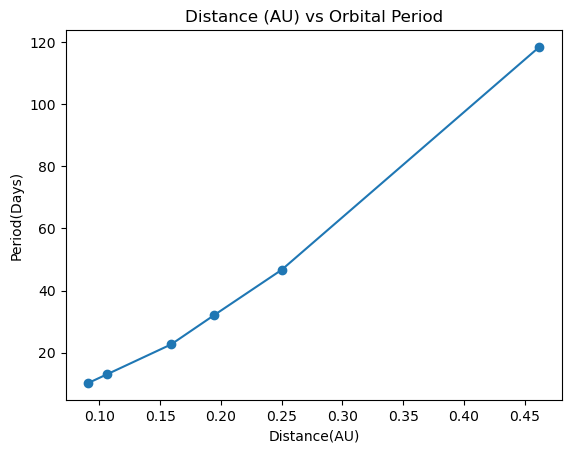

In [8]:
# plt is our plot object which handles plotting data
# For physics and astronomy, you probably want a scatter plot

# plt.scatter uses the 1st thing for the horizontal axis
# and the 2nd thing for the vertical axis so (x,y)
plt.plot(r_au, t_days)
plt.scatter(r_au, t_days)
plt.title("Distance (AU) vs Orbital Period")
plt.xlabel("Distance(AU)")
plt.ylabel("Period(Days)");

# Convert Distances and Times
Convert the orbital radii from AU to meters using the constant above. Also convert the times from days into seconds. This is straightforward dimensional analysis.

In [9]:
# Convert AU to m using one of the constants above
r_m = r_au * d_au # Add code here

# How many seconds are in a day?
t_s = 24*60*60 # Add code here

# Linearize the Data
Using Kepler's 3rd law, linearize your data. Kepler's 3rd law:
$$ t^2=\frac{4\pi^2}{GM}r^3 $$

Store the linearized distances in the list called <code>x</code> and the linearized times in the list called <code>y</code>. 

**This part is important! The data won't be linear if you don't apply the correct mathematical process to your various lists of data.**

In [10]:
# Hint: In Python, exponents work like this
# a^2 (a squared) would be a**2
x = r_m**3
y = (t_days*t_s)**2

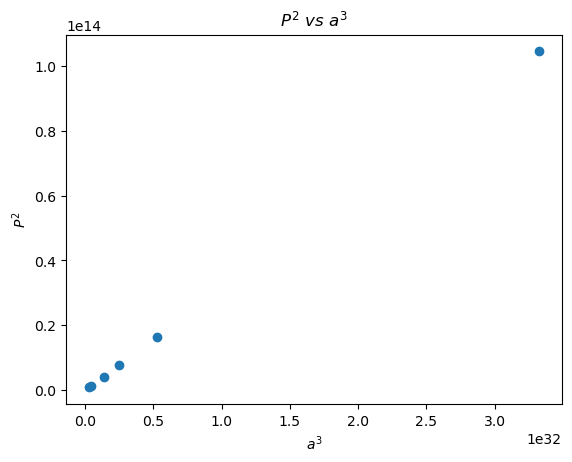

In [11]:
plt.scatter(x,y)
plt.title(r'$P^2\ vs\ a^3$')
plt.xlabel(r'$a^3$')
plt.ylabel(r'$P^2$');

# Linear Regression
This line of code uses our data in the lists x and y to find the various parameters for a linear regression. We ultimately only will need the slope here. Remember, a linear regression is asking how close to linear is the mathematical relationship between our x and y variables.

For someone new to this python notation, the command (or method or function) called <code>linregress(...)</code> takes as one input our list of linearized distances as the list <code>x</code> and takes as the other input our list of linearized times as the list <code>y</code>. But it is all the stuff on the left of the <code>=</code> that's likely weird to you. The linregress command returns 5 things by default: the slope of our linear fit, the intercept of our linear fit, and some statistics about the quality of the fit. The *r*, *p*, and *standard error* values help us decide of the fit is trustworthy in a statical sense. We will ignore them here.

In [12]:
# get coefficients of our linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

# Make a New DataFrame
By putting the linearized data in a new DataFrame, we can easily plot a linear regression using Seaborn. This is a common data science technique. 

In [13]:
# Make a new DataFrame and take a look at it.
data2 = pd.DataFrame({'r^3':x, 't^2':y})

# Most of time, in python, a variable by itself
# like this just prints the contents of the variable.
data2

,r^3,t^2
0,2.543302e+30,7.925344e+11
1,4.019679e+30,1.266439e+12
2,1.356642e+31,3.842279e+12
3,2.464217e+31,7.642160e+12
4,5.273438e+31,1.627242e+13
5,3.328126e+32,1.046086e+14


If you've done the rest of this process correctly, here you need to recognize which parts of Kepler's 3rd Law is the *slope* of our linear relationship. The slope of a line should a constant so which parts are constant here?
$$ t^2=\frac{4\pi^2}{GM}r^3 $$

Using the <code>slope</code> from the regression above, if you set the slope equal to the constants from Kepler's 3rd Law, rearrange algebraically (on paper likely) the expression such that you can find the mass of the star in the center of this exoplanet solar system.


In [14]:
# Use the algebraically rearranged slope expression
# to find the mass of the star in this system.
m_star = 4*np.pi**2/(G*slope)

# Find the ratio of this star's mass to that of the sun, given above.
ratio = m_star/m_sun

# Display the ratio.
print(f'ratio = {ratio:1.3f}')

ratio = 0.945


# Compare with actual result quoted in wikipedia
[Kepler 11 System has a central star](https://en.wikipedia.org/wiki/Kepler-11b) with mass 0.95 * mass of our Sun

In [15]:
percent_error = (m_sun*0.95 - m_star)/m_sun
print(f'percent error in calculating mass of Kepler 11 central star is: {percent_error*100:1.3f}% !!')

percent error in calculating mass of Kepler 11 central star is: 0.453% !!


# Plot Linear Regression
This last step uses the Seaborn library to plot linear regression and to overplot the data points. This is a very common visualization technique and allows for a visual confirmation of the relationship. Seaborn is not the only way to plot a linear regression but it is very popular and quite visually appealing.

<AxesSubplot:xlabel='r^3', ylabel='t^2'>

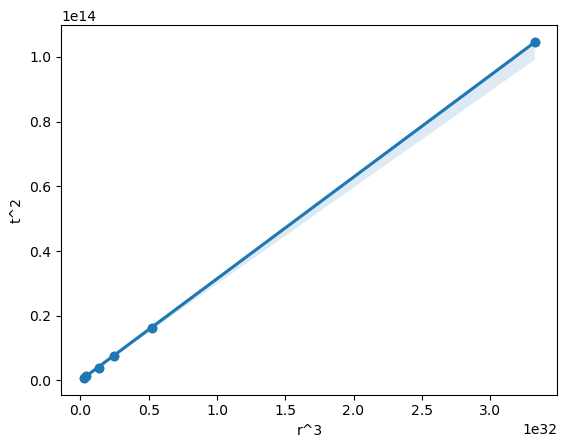

In [16]:
plt.scatter(x,y)
sns.regplot(x="r^3", y="t^2", data=data2)

# Linearize the Solar System Data
Using Kepler's 3rd law, linearize your data. Kepler's 3rd law:
$$ t^2=\frac{4\pi^2}{GM}r^3 $$

In [17]:
# Read in the Github data that will be used for the calculations.
data1 = pd.read_csv("updated_solar_system_orbits.csv")

In [18]:
data1

,Planet,Semimajor Axis (AU),Period (y),Eccentricity,Semifocal Distance (AU),Semiminor Axis (AU),Perihelion Distance (AU)
0,Mercury,0.39,0.24,0.210,0.08190,0.381304,0.12810
1,Venus,0.72,0.60,0.010,0.00720,0.719964,0.00280
2,Earth,1.00,1.00,0.020,0.02000,0.999800,0.00000
3,Mars,1.52,1.88,0.090,0.13680,1.513831,-0.04680
4,Encke,2.21,3.30,0.847,1.87187,1.174820,-1.02487
5,Vesta,2.36,3.63,0.090,0.21240,2.350423,-0.12240
6,Ceres,2.77,4.60,0.080,0.22160,2.761122,-0.14160
7,Pallas,2.77,4.62,0.230,0.63710,2.695738,-0.40710
8,Jupiter,5.20,11.86,0.050,0.26000,5.193496,-0.21000
9,Saturn,9.54,29.46,0.060,0.57240,9.522813,-0.51240


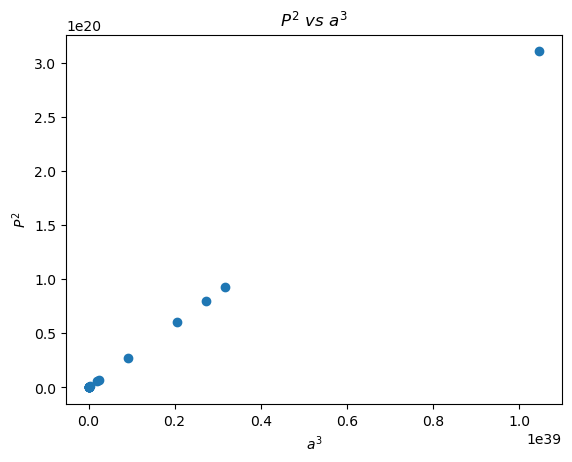

In [19]:
r_au = np.array(data1['Semimajor Axis (AU)'])
t_years = np.array(data1['Period (y)'])
t_days = t_years * 365
r_m = r_au * d_au
x = r_m**3
y = (t_days*t_s)**2
plt.scatter(x,y)
plt.title(r'$P^2\ vs\ a^3$')
plt.xlabel(r'$a^3$')
plt.ylabel(r'$P^2$');

In [20]:
# get coefficients of our linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
# Make a new DataFrame and take a look at it.
data2 = pd.DataFrame({'r^3':x, 't^2':y})

# Most of time, in python, a variable by itself
# like this just prints the contents of the variable.
data2

,r^3,t^2
0,2.002016e+32,5.728431e+13
1,1.259712e+33,3.580269e+14
2,3.375000e+33,9.945193e+14
3,1.185235e+34,3.515029e+15
4,3.642928e+34,1.083032e+16
5,4.436186e+34,1.310468e+16
6,7.173202e+34,2.104403e+16
7,7.173202e+34,2.122742e+16
8,4.745520e+35,1.398887e+17
9,2.930346e+36,8.631349e+17


In [21]:
# Use the algebraically rearranged slope expression
# to find the mass of the star in this system.
m_star = 4*np.pi**2/(G*slope)

# Find the ratio of this star's mass to that of the sun, given above.
ratio = m_star/m_sun

# Display the ratio.
print(f'ratio = {ratio:1.3f}')

ratio = 1.003


In [23]:
percent_error = (m_sun - m_star)/m_sun
print(f'percent error in calculating mass of Sun\'s mass is: {percent_error*100:1.3f}% !!')

percent error in calculating mass of Sun's mass is: -0.330% !!
